# Python for bioimage analysis

In [1]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "matplotlib",
#     "ndv[jupyter,vispy]",
#     "numpy",
# ]
# ///

format later:
Description

In this Notebook...
Objectives

    ...
    ...

Table of Contentss

    ...
    ...



# 1. Import all necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ndv

In [3]:
image = plt.imread("/Users/mariatheiss/Documents/Teaching/bobiac/melba_roy.tiff")

# 2. Images as numpy arrays 

In [4]:
# TODO: Explain here how to open an image first 

## 2.1. Loading or generating images 

In [21]:
image = np.zeros([5,5], dtype=np.uint8) # explain everything here

## 2.2. Inspecting the images

In [22]:
image 

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [23]:
print(image) # or using the print function. TODO: Could use rich 

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


Let's print a few properties of image

In [8]:
print(f'Type of the image: {type(image)}') 
print(f'Shape of the image: {image.shape}')  # Dimensions of the image
print(f'Minimum pixel value: {image.min()}')  # Min pixel value
print(f'Maximum pixel value: {image.max()}')  # Max pixel value
print(f'Mean pixel value: {image.mean():.2f}')  # Average pixel value

Type of the image: <class 'numpy.ndarray'>
Shape of the image: (500, 446)
Minimum pixel value: 0
Maximum pixel value: 246
Mean pixel value: 99.86


Now, let's generate a simple plot of the image

In [24]:
# TODO: first without a function, than explain function 
def simpleplot(image): # example of function 
    plt.imshow(image, cmap = "gray")# vmax=4)
    plt.colorbar()
    plt.show()

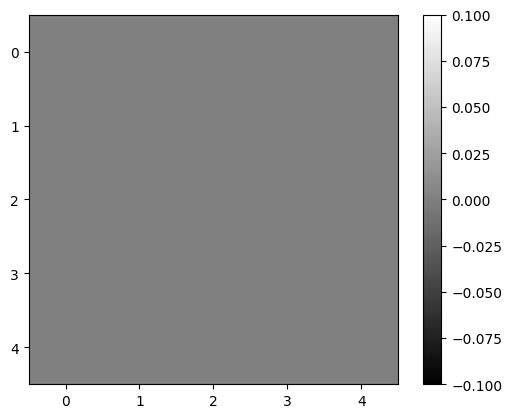

In [26]:
simpleplot(image)

In [28]:
image.flatten() # explain .flatten(). Explain graphically! 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=uint8)

Text(0.5, 0, 'Gray value uint8')

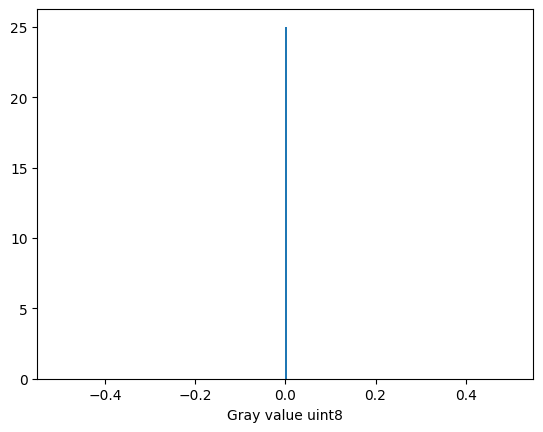

In [27]:
plt.hist(image.flatten(), bins = 256) 
plt.xlabel(f"Gray value {image.dtype}") # format string

In [13]:
# note: indexing discussed in previous section 

In [30]:
# Show them how to query images. Eva introduced that using lists 
# Go slower here! 
# draw a representation
image[0]

array([0, 0, 0, 0, 0], dtype=uint8)

In [38]:
image.shape

(5, 5)

In [36]:
#show first 2 

In [ ]:
image

### Task: Make a copy of image, and name it image2 (new variable). Turn the middle pixel of image2 to 255
And plot it
what color is it and why 
Learning goal: 
* What does "white" mean
* copying numpy arrays correctly 
* Repeat of indexing

### Pitfalls

In [39]:
image2 = image 

In [40]:
image2

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [43]:
image2[2,2] = 255 # using a self-generated image, this will change the original image. Getting an image using plt.imread makes the original image read-only

### Task: Now inspect the pixel values of image and image2

In [44]:
image2

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0, 255,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=uint8)

In [45]:
image

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0, 255,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=uint8)

### Solution 

In [52]:
image = np.zeros([5,5], dtype = np.uint8) # in case it was overwritten

In [47]:
image2 = np.array(image)

In [57]:
image2 = np.array(image, copy = True)

In [58]:
image2 = image.copy() # another solution

In [54]:
image2[2, 2] = 255 

In [55]:
image2

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0, 255,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=uint8)

In [56]:
image

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
simpleplot(image)

In [ ]:
#Task: asign a value of 255 to the central column... 

### Task: Make a copy of image and name it "frame". Assign to all pixels but the rim-pixels a value of 255
Tip: For-loops are not necessary here! 

### Solution

In [66]:
frame = np.array(image)

In [67]:
frame[1:-1, 1:-1] = 255
# or, less general: image3[1:4, 1:4] = 255

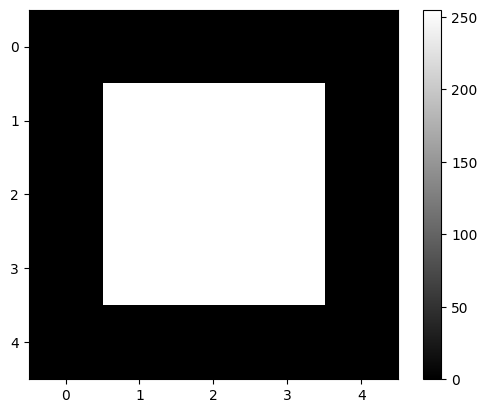

In [68]:
simpleplot(frame)

### Task: Make a copy of image and name it "vstripes". Assign a value of 255 to every other pixel in y to give it a vertical stripy pattern 

### Solution

In [63]:
vstripes = np.array(image)
ymax = len(image[0]) # TODO:  is this y or is this x?
for i in range(0, ymax, 2):
    vstripes[:, i] = 255

In [64]:
len(image[1])

5

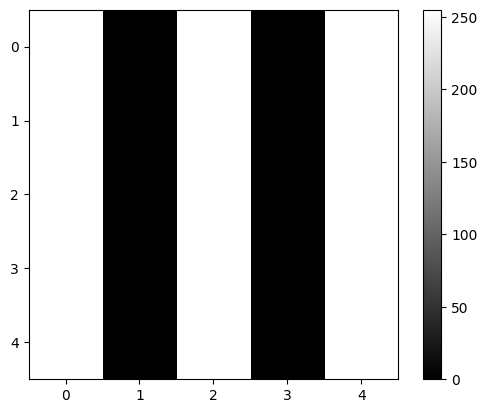

In [65]:
simpleplot(vstripes)

### Bonus task: generate an image "checkerboard" that has a checkerboard pattern. 
Tips: 
* there are multiple solutions
* you can use image or vstripes as a template 
* % is the modulo operator. The modulo operator yields the remainder from the division of the first argument by the second. Example: 5%3 = 2
* image.T transposes image. This means it flips the image values over the diagonal of image.
* ^ is an exclusive or. 

### Solution 1

In [69]:
checkerboard = vstripes ^ vstripes.T

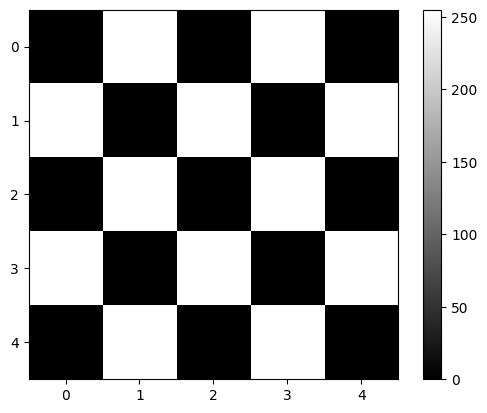

In [70]:
simpleplot(checkerboard)

In [74]:
checkerboard

array([[  0, 255,   0, 255,   0],
       [255,   0, 255,   0, 255],
       [  0, 255,   0, 255,   0],
       [255,   0, 255,   0, 255],
       [  0, 255,   0, 255,   0]], dtype=uint8)

### Solution 2

In [71]:
checkerboard2 = np.array(image)

In [72]:
for i in range(0, 5):
    for j in range(0, 5):
        checkerboard2[i, j] = 255 * ((i + j % 2) % 2)

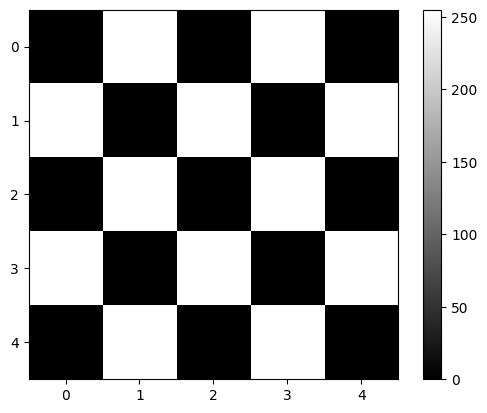

In [73]:
simpleplot(checkerboard2)


## 2.2. Numpy and multichannel/z-stacks
A

Use real image! 
Learning goal: 
* handling image axes
* avoiding int overflow, why it's a good idea to use numpy 

In [76]:
multichannel = np.random.randint(0, 256, size=(2, 5, 5), dtype=np.uint8)

In [78]:
multichannel.shape # print and describe

(2, 5, 5)

In [ ]:
multichannel # print datatype

### Task: plot the first channel

In [79]:
# also print the shape 
multichannel[0,:,:].shape

(5, 5)

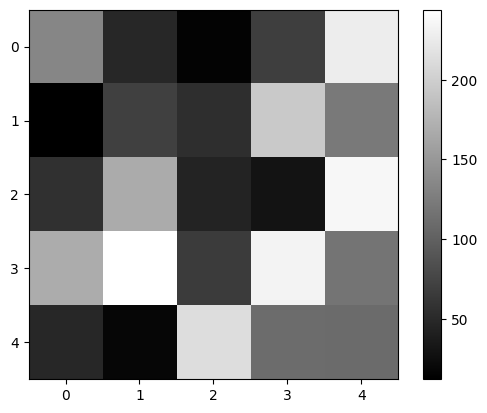

In [80]:
simpleplot(multichannel[0,:,:])

### Task: plot the second channel

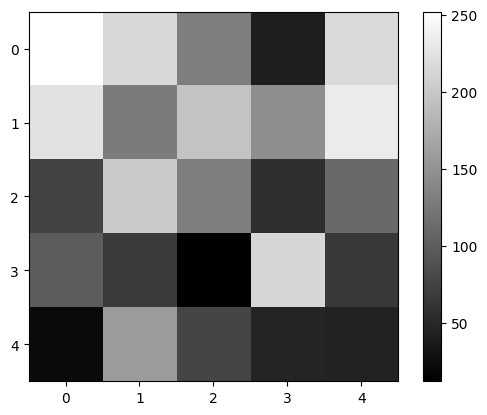

In [81]:
simpleplot(multichannel[1,:,:])

### Task: generate an image that is the mean of channel 0 and channel 1: "mean projection" 
TODO: Not of channels, of stacks
collapse image "multichannel" into a single-channel image by averaging the values in each channel at every pixel. The result should be a (5, 5) array where each value represents the mean of the two original channels at that position. This is called the mean projection

Tip: https://numpy.org/doc/2.2/reference/routines.statistics.html 

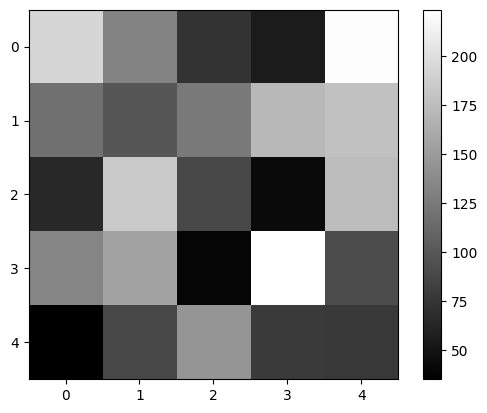

In [82]:
mean_of_chanels = np.mean(multichannel, axis = 0)
simpleplot(mean_of_chanels)

In [83]:
mean_of_chanels

array([[193. , 131.5,  73. ,  55. , 222. ],
       [118. ,  99. , 125. , 170.5, 177.5],
       [ 65.5, 184. ,  87.5,  43. , 173.5],
       [133.5, 155.5,  39. , 223.5,  91.5],
       [ 35. ,  88. , 145. ,  78. ,  76.5]])

### Task: sanity-check whether np.mean does what you expect it to do without using numpy 

### Pitfall

In [84]:
channel1 = multichannel[0,:,:]
channel2 = multichannel[1,:,:]

mean_of_chanels == (channel1 + channel2)/2 # integer overflow 

array([[False, False,  True,  True, False],
       [ True,  True,  True, False, False],
       [ True, False,  True,  True, False],
       [False, False,  True, False,  True],
       [ True,  True, False,  True,  True]])

In [85]:
mean_of_chanels 

array([[193. , 131.5,  73. ,  55. , 222. ],
       [118. ,  99. , 125. , 170.5, 177.5],
       [ 65.5, 184. ,  87.5,  43. , 173.5],
       [133.5, 155.5,  39. , 223.5,  91.5],
       [ 35. ,  88. , 145. ,  78. ,  76.5]])

### Solution 1

In [ ]:
(multichannel[0,:,:].astype(np.uint16) + multichannel[1,:,:].astype(np.uint16))/2 

In [ ]:
mean_of_chanels == (multichannel[0,:,:].astype(np.uint16) + multichannel[1,:,:].astype(np.uint16))/2 #cast to unint16 #TODO: too advanced, remove!

### Solution 2

In [ ]:
mean_of_chanels == (multichannel[0,:,:]/2 + multichannel[1,:,:]/2) # or divide by two first

### Task: compute the max projection 

Have a table of numpy operations instead of the link. Let the participants plot a bunch of them
task: max intensity and plot
Tip: https://numpy.org/doc/2.2/reference/routines.statistics.html 

### Solution

In [86]:
maxproject = np.max(multichannel, axis = 0)

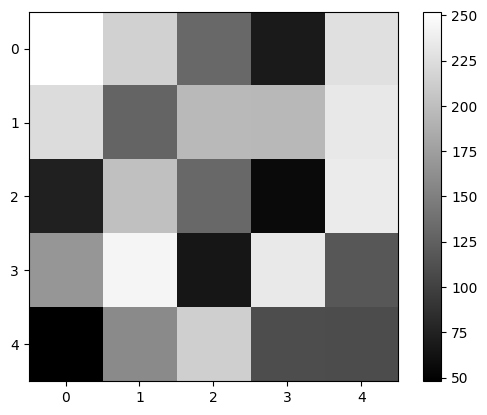

In [88]:
simpleplot(np.max(multichannel, axis = 0))

# 3. Visualization

## 3.1. Visualization using Matplotlib

In [ ]:
def show_2_channels(image):
    
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    
    for i in range(2):
        im = axes[i].imshow(image[i, :, :], cmap='gray', vmin=0, vmax=255)
        axes[i].imshow(image[i, :, :], cmap='gray', vmin=0, vmax=255)
        axes[i].set_title(f'Channel {i}')
        axes[i].axis('off')
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

In [ ]:
show_2_channels(multichannel)

In [ ]:
# Task: plot all channels of the following image. Write a function show_all_channels(). 

In [ ]:
threechannel = np.random.randint(0, 256, size=(3, 5, 5), dtype=np.uint8)

In [ ]:
np.shape(threechannel)[0]

In [ ]:
show_2_channels(threechannel)

In [ ]:
def show_all_channels(image, n_channels = None):
    if not n_channels: 
        nchannels = np.shape(image)[0]
    fig, axes = plt.subplots(1, nchannels, figsize=(6, 3))
    for i in range(nchannels):
        im = axes[i].imshow(image[i, :, ], cmap='gray', vmin=0, vmax=255)
        axes[i].imshow(image[i, :, :], cmap='gray', vmin=0, vmax=255)
        axes[i].set_title(f'Channel {i}')
        axes[i].axis('off')
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

In [ ]:
show_all_channels(threechannel)

## 3.2 Visualization using ndv

In [91]:
ndv.imshow?

Signature:
ndv.imshow(
    data: 'Any | DataWrapper',
    /,
    *,
    viewer_options: 'ArrayViewerModel | ArrayViewerModelKwargs | None' = None,
    display_model: 'ArrayDisplayModel | None' = None,
    **display_kwargs: 'Unpack[ArrayDisplayModelKwargs]',
) -> 'ArrayViewer'
Docstring:
Display an array or DataWrapper in a new `ArrayViewer` window.

This convenience function creates an `ArrayViewer` instance populated with `data`,
calls `show()` on it, and then runs the application.

Parameters
----------
data : Any | DataWrapper
    The data to be displayed. Any ArrayLike object or an `ndv.DataWrapper`.
display_model: ArrayDisplayModel, optional
    The display model to use. If not provided, a new one will be created.
viewer_options: ArrayViewerModel | ArrayViewerModelKwargs, optional
    Either a [`ArrayViewerModel`][ndv.models.ArrayViewerModel] or a dictionary of
    keyword arguments used to create one.
    See docs for [`ArrayViewerModel`][ndv.models.ArrayViewerModel] for options.

In [ ]:
#Time (T), Channel (C), Z (Z), Y, X

In [90]:
image

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)